<a href="https://colab.research.google.com/github/eddietheengineer/documentation/blob/master/Thermistor_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Thermistor Tolerance Calculator
Let's talk thermistors! Today we're going to break down how to calculate the accuracy of a thermistor



In [105]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

First off, we need to define a few characteristics of the sensor we will be reviewing today, the Semitec 104NT-4-R025H42G. This thermistor is by far the most common thermistor used in 3d printer hotends. The spec sheet can be seen here: [Semitec Thermistor Datasheet](https://www.mouser.com/datasheet/2/362/P18_NT_Thermistor-1535133.pdf)


In [106]:
minRatedTemp_degC = -50
maxRatedTemp_degC = 300

# Calculate Thermistor Curve using Beta
In this first section, we define the easiest way to define a thermistor vs. temperature curve. This method only requires 3 pieces of data. The nominal temperature and nominal resistance define a specific point (essentially X, Y coordinates), and the beta value defines a "slope" even though it's not actually a true linear slope characteristic. 



In [107]:
nominalTemp_degC = 25
nominalResistance_Ohms = 100000
beta = 4267

Next, we'll calculate the resistance for each temperature using these three parameters:

In [108]:
temperature_array = np.array(range(minRatedTemp_degC,maxRatedTemp_degC))
resistance_array = np.array(range(len(temperature_array)))

def celsiusToKelvin(temperature):
  return temperature + 273.15

for i in range(len(temperature_array)):
  resistance_array[i] = int(nominalResistance_Ohms * math.exp(beta*((1/celsiusToKelvin(temperature_array[i]))-(1/(celsiusToKelvin(nominalTemp_degC))))))


Finally, lets make a quick plot of these values

Text(0.5, 0, 'Temperature')

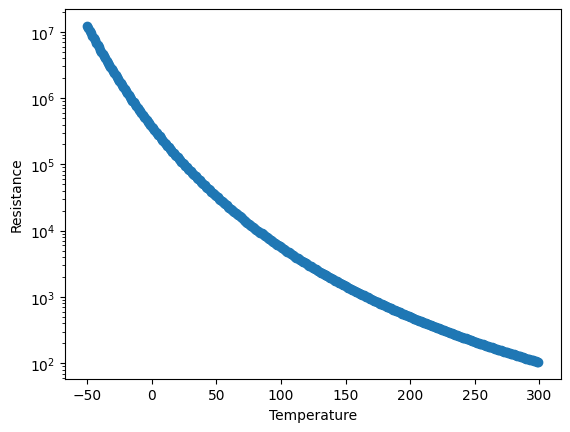

In [110]:
plt.clf()
plt.scatter(temperature_array,resistance_array)
plt.ylabel('Resistance')
plt.yscale('log')
plt.xlabel('Temperature')